In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


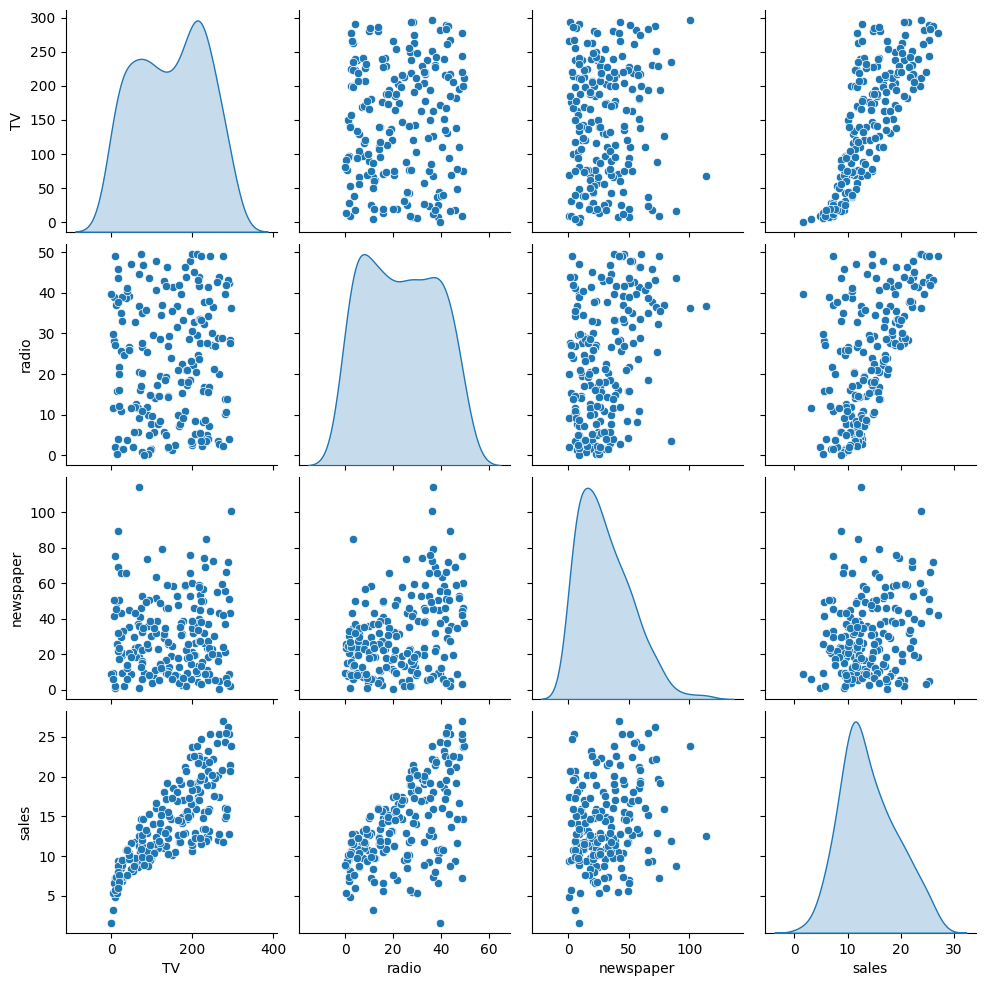

In [3]:
# We do all EDA that need and we know right now all is ok with this data frame
sns.pairplot(data=df , diag_kind="kde")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
# Assign X features adn y label

X = df.drop('sales',axis=1)
y = df['sales']

In [6]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
len(X)

200

In [9]:
len(y)

200

In [10]:
len(X_train)

140

In [11]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [12]:
len(X_test)

60

In [13]:
len(y_train)

140

In [14]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [15]:
len(y_test)

60

In [16]:
from sklearn.linear_model import LinearRegression
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

In [17]:
# create Linear regression Model (estimator)
model = LinearRegression()

In [18]:
type(model)

sklearn.linear_model._base.LinearRegression

In [19]:
# train our model over our training parts ( X_train , y_train) of our data frame 
###### WE SHOULD NOT USE X_TEST AND y_test for training ########
model.fit(X_train,y_train)

LinearRegression()

In [20]:
model.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

In [21]:
# what that mean : ( not exact)
# y_hat = 0.04469599*TV_advertising_spent + 0.1875657*radio_advertising_spent + (-0.00032275)*newspaper_advertising_spent

In [22]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [23]:
# not 100% right see next cell! 
sales_prediction = 0.04469599*230.1 + 0.1875657*37.8 + (-0.00032275)*69.2
sales_prediction

17.352196458999998

In [24]:
model.predict([[230.1,37.8,69.2]])

c:\Users\engam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([20.50372383])

# Evaluate our model and calculate Errors and scores

In [25]:
test_prediction_y_hat = model.predict(X_test)

In [26]:
test_prediction_y_hat # We used to call it y_pred as prediction of X_test based on the estimator we got

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [27]:
y_pred = model.predict(X_test) # NOTICE : X_test has never been touched by the model under training step.

In [28]:
y.mean()

14.0225

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [31]:
MAE = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute error for this model is {MAE}")

Mean Absolute error for this model is 1.213745773614481


In [33]:
MSE = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error for this model is {MSE}")

MEan Squared Error for this model is 2.2987166978863796


In [34]:
RMSE = np.sqrt(MSE) # RMSE = MSE**0.5 or RMSE = sqrt(MSE) 
print(f"Root Mean Squared Error for this model is {RMSE}")

Root Mean Squared Error for this model is 1.5161519375993884


In [35]:
# more indication for what mean this errors , so I can calculate Tolerance
tolerance = RMSE / y.mean()
print(f" Tolerance for this model based on prediction value = {tolerance}")

 Tolerance for this model based on prediction value = 0.1081227981885818


In [36]:
# We can calculate a score for our model , which is r2 score

model_r2_score = r2_score(y_test,y_pred)
print(f" R2_score for our model is {model_r2_score}")

 R2_ score for our model is 0.9185780903322445


In [37]:
residual_error = y_test - y_pred

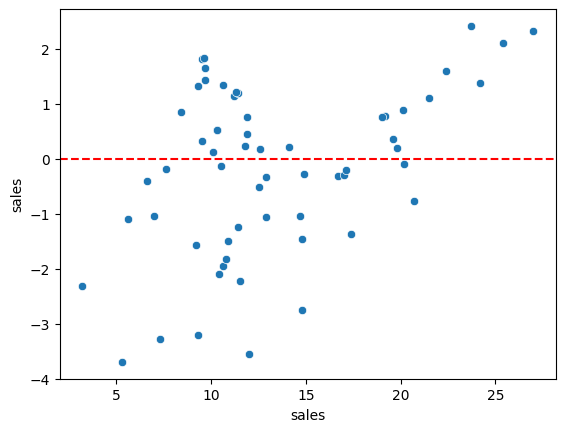

In [38]:
sns.scatterplot(x = y_test , y = residual_error)
plt.axhline(y=0 , color = "red" , linestyle = "--")

# Once ok with Score and tolerance we can build our last model : 

In [39]:
final_model = LinearRegression()

In [40]:
final_model.fit(X,y)

LinearRegression()

In [41]:
# Compare coef_ of final model vs. X_train,y_train trained model
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [42]:
model.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

In [58]:
# We would show how our prediction looks like against our real data 
# NOTICE : this step we do for small data set that has few columns  

yhat = final_model.predict(X)
#yhat 

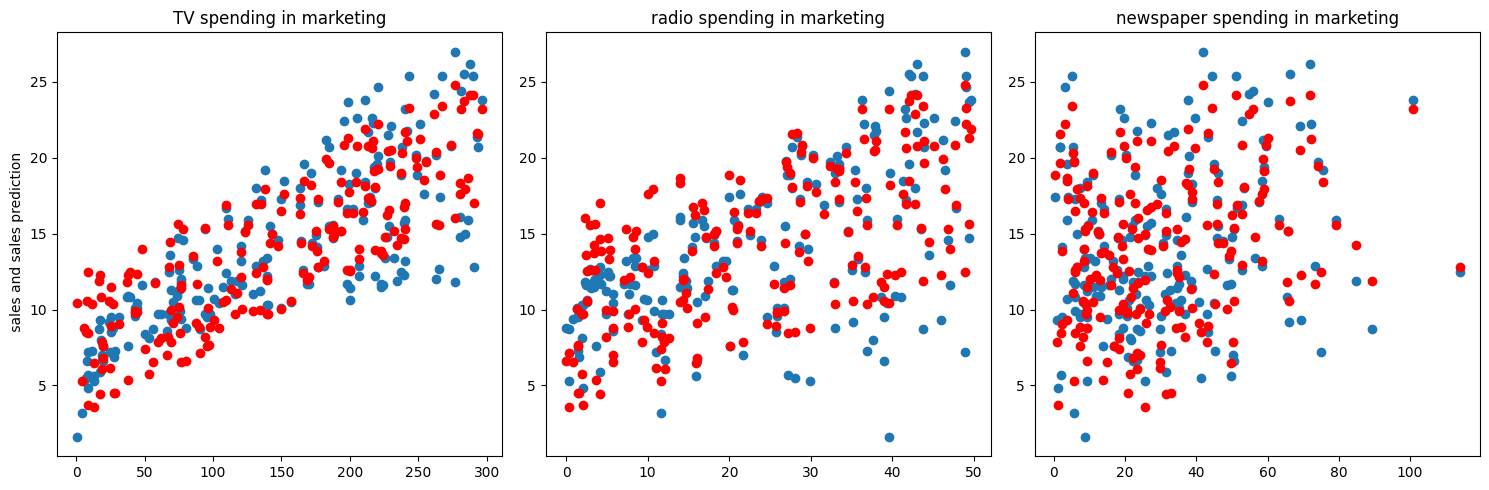

In [59]:
# we shal plot all values and precition for the three columns in one plot.

fig , axes = plt.subplots(nrows = 1 , # as number of label which is one label
                         ncols = 3 , # as number of columns in our data set
                         figsize = (15,5)) # size of our figure
# for TV
axes[0].plot(df['TV'],df['sales'], 'o') # Real sales values
axes[0].plot(df['TV'],yhat,'o',color = "red") # predicted sales values in red
axes[0].set_ylabel(" sales and sales prediction")
axes[0].set_title("TV spending in marketing")
# for radio
axes[1].plot(df['radio'],df['sales'], 'o') # Real sales values
axes[1].plot(df['radio'],yhat,'o',color = "red") # predicted sales values in red
#axes[1].set_ylabel(" sales and sales prediction")
axes[1].set_title("radio spending in marketing")
# for newspaper
axes[2].plot(df['newspaper'],df['sales'], 'o') # Real sales values
axes[2].plot(df['newspaper'],yhat,'o',color = "red") # predicted sales values in red
#axes[2].set_ylabel(" sales and sales prediction")
axes[2].set_title("newspaper spending in marketing")
plt.tight_layout();

# We can plot residual error over whole data

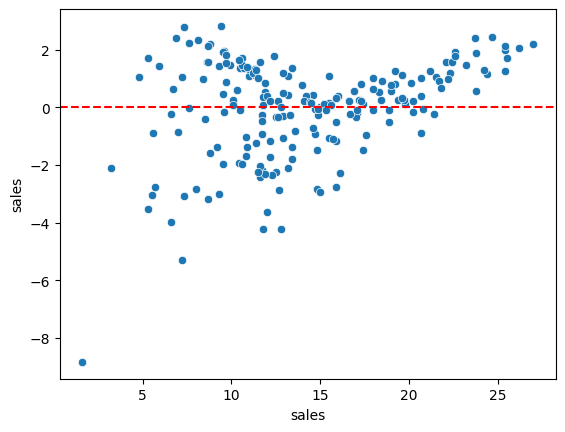

In [60]:
whole_data_residual_error = y-yhat
sns.scatterplot(x=y , y=whole_data_residual_error)
plt.axhline(y=0,color = "red" , linestyle = "--")

In [61]:
# Once we happy with results we can save model to be published

from joblib import dump
dump(final_model ,"sales_estimator_20240111.joblib")

['sales_estimator_20240111.joblib']

In [62]:
# Customer that will use this model can load it and use it as next : 
from joblib import load
model_2024_01_11 = load("sales_estimator_20240111.joblib")

In [63]:
model_2024_01_11.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [64]:
X.shape

(200, 3)

In [65]:
campaign = [[335,40,23]]

In [66]:
# Testing this model
sales_pred = model_2024_01_11.predict(campaign)
print(f" Sales prediction for {campaign} is = {sales_pred}")

 Sales prediction for [[335, 40, 23]] is = [25.78738393]


c:\Users\engam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
